# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_06](img/fig_06.png)


### MACHINE LEARNING MODELS ( RANDOM FORESTS - IMBALANCED DATASET)

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from random import sample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../Data/dfm.csv')

In [3]:
df

,FLIGHT_STATUS,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,0.0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
X = df.drop(columns ='FLIGHT_STATUS')

In [5]:
X

,DISTANCE,MONTH_10,MONTH_11,MONTH_12,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,ORIGIN_ABQ,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ANC,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BTR,ORIGIN_BTV,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_BZN,ORIGIN_CAE,ORIGIN_CAK,ORIGIN_CHA,ORIGIN_CHO,ORIGIN_CHS,ORIGIN_CID,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_COS,ORIGIN_CRW,ORIGIN_CVG,ORIGIN_DAB,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_EGE,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_EYW,ORIGIN_FAI,ORIGIN_FAR,ORIGIN_FAY,ORIGIN_FCA,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_FSD,ORIGIN_GEG,ORIGIN_GNV,ORIGIN_GPT,ORIGIN_GRB,ORIGIN_GRR,ORIGIN_GSO,ORIGIN_GSP,ORIGIN_GTF,ORIGIN_HDN,ORIGIN_HNL,ORIGIN_HOU,ORIGIN_HPN,ORIGIN_HSV,ORIGIN_IAD,ORIGIN_IAH,ORIGIN_ICT,ORIGIN_ILM,ORIGIN_IND,ORIGIN_JAC,ORIGIN_JAN,ORIGIN_JAX,ORIGIN_JFK,ORIGIN_JNU,ORIGIN_KOA,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LEX,ORIGIN_LFT,ORIGIN_LGA,ORIGIN_LGB,ORIGIN_LIH,ORIGIN_LIT,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDT,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MIA,ORIGIN_MKE,ORIGIN_MLB,ORIGIN_MOB,ORIGIN_MSN,ORIGIN_MSO,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_MTJ,ORIGIN_MYR,ORIGIN_OAK,ORIGIN_OGG,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORD,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHF,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PSC,ORIGIN_PSP,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RAP,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROA,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SAV,ORIGIN_SBN,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STL,ORIGIN_STT,ORIGIN_STX,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TYS,ORIGIN_VPS,ORIGIN_XNA,ORIGIN_STATE_ABR_AL,ORIGIN_STATE_ABR_AR,ORIGIN_STATE_ABR_AZ,ORIGIN_STATE_ABR_CA,ORIGIN_STATE_ABR_CO,ORIGIN_STATE_ABR_CT,ORIGIN_STATE_ABR_FL,ORIGIN_STATE_ABR_GA,ORIGIN_STATE_ABR_HI,ORIGIN_STATE_ABR_IA,ORIGIN_STATE_ABR_ID,ORIGIN_STATE_ABR_IL,ORIGIN_STATE_ABR_IN,ORIGIN_STATE_ABR_KS,ORIGIN_STATE_ABR_KY,ORIGIN_STATE_ABR_LA,ORIGIN_STATE_ABR_MA,ORIGIN_STATE_ABR_MD,ORIGIN_STATE_ABR_ME,ORIGIN_STATE_ABR_MI,ORIGIN_STATE_ABR_MN,ORIGIN_STATE_ABR_MO,ORIGIN_STATE_ABR_MS,ORIGIN_STATE_ABR_MT,ORIGIN_STATE_ABR_NC,ORIGIN_STATE_ABR_ND,ORIGIN_STATE_ABR_NE,ORIGIN_STATE_ABR_NH,ORIGIN_STATE_ABR_NJ,ORIGIN_STATE_ABR_NM,ORIGIN_STATE_ABR_NV,ORIGIN_STATE_ABR_NY,ORIGIN_STATE_ABR_OH,ORIGIN_STATE_ABR_OK,ORIGIN_STATE_ABR_OR,ORIGIN_STATE_ABR_PA,ORIGIN_STATE_ABR_PR,ORIGIN_STATE_ABR_RI,ORIGIN_STATE_ABR_SC,ORIGIN_STATE_ABR_SD,ORIGIN_STATE_ABR_TN,ORIGIN_STATE_ABR_TX,ORIGIN_STATE_ABR_UT,ORIGIN_STATE_ABR_VA,ORIGIN_STATE_ABR_VI,ORIGIN_STATE_ABR_VT,ORIGIN_STATE_ABR_WA,ORIGIN_STATE_ABR_WI,ORIGIN_STATE_ABR_WV,ORIGIN_STATE_ABR_WY,DEST_BOS,DEST_DCA,DEST_DEN,DEST_DFW,DEST_DTW,DEST_FLL,DEST_JFK,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_RDU,DEST_SAN,DEST_SEA,DEST_SFO,DEST_SLC,DEST_TPA,DEST_STATE_ABR_CO,DEST_STATE_ABR_FL,DEST_STATE_ABR_GA,DEST_STATE_ABR_IL,DEST_STATE_ABR_MA,DEST_STATE_ABR_MI,DEST_STATE_ABR_MN,DEST_STATE_ABR_NC,DEST_STATE_ABR_NV,DEST_STATE_ABR_NY,DEST_STATE_ABR_TX,DEST_STATE_ABR_UT,DEST_STATE_ABR_VA,DEST_STATE_ABR_WA
0,1020.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
y = df['FLIGHT_STATUS']

In [10]:
X.shape

(697697, 254)

In [11]:
y.shape

(697697,)

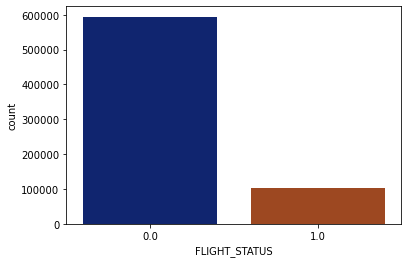

In [12]:
sns.countplot(x="FLIGHT_STATUS", palette="dark", data= df);

In [13]:
ontime = df[df['FLIGHT_STATUS'] ==0 ]
delayed = df[df['FLIGHT_STATUS'] ==1 ]

In [14]:
print(ontime.shape,delayed.shape )

(594172, 255) (103525, 255)


In [15]:
df['FLIGHT_STATUS'].value_counts(normalize= True)

0.0    0.851619
1.0    0.148381
Name: FLIGHT_STATUS, dtype: float64

In [16]:
oversample = SMOTE()

In [17]:
X, y = oversample.fit_resample(X, y)

In [18]:
X.shape

(1188344, 254)

In [19]:
y.shape

(1188344,)

# Random Forests (BALANCED DATASET)

In [20]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rfc = RandomForestClassifier( n_estimators=10, max_features= 'auto', random_state= 42)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [23]:
preds = rfc.predict(X_test)

In [24]:
preds

array([0., 1., 0., ..., 0., 0., 1.])

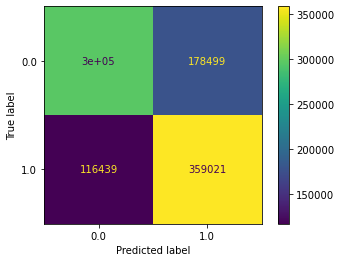

In [25]:
plot_confusion_matrix(rfc, X_test, y_test);

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67    475215
         1.0       0.67      0.76      0.71    475460

    accuracy                           0.69    950675
   macro avg       0.69      0.69      0.69    950675
weighted avg       0.69      0.69      0.69    950675



In [27]:
rfc.feature_importances_

array([7.03416322e-02, 2.60456536e-02, 3.11265605e-02, 3.40062350e-02,
       3.30876063e-02, 2.35594162e-02, 2.25985340e-02, 2.03698108e-02,
       2.77159683e-02, 3.16603275e-02, 2.54789391e-02, 2.54371842e-02,
       3.22647145e-02, 4.62862525e-02, 5.00947433e-02, 3.66853826e-02,
       3.86826445e-02, 4.00186622e-02, 6.09778122e-04, 4.26126049e-04,
       4.79988676e-04, 1.05344514e-03, 4.32066233e-03, 3.87400296e-04,
       2.80051358e-03, 2.57052645e-04, 2.92396998e-04, 1.28119068e-03,
       6.44560963e-04, 5.04912532e-04, 1.99688724e-04, 1.48484740e-03,
       5.88972326e-04, 2.34142551e-03, 8.11246449e-05, 2.13684942e-04,
       6.85495705e-04, 2.74071479e-04, 1.44805972e-03, 6.41272736e-04,
       4.76880226e-04, 3.00460850e-04, 4.07877056e-04, 3.52364975e-04,
       9.45698065e-04, 1.42000789e-04, 1.03582074e-03, 1.84930365e-03,
       1.06004174e-03, 2.49365343e-04, 1.69075186e-04, 2.38428570e-03,
       6.56236876e-04, 1.08208672e-03, 5.38306169e-04, 2.14943042e-03,
      

In [28]:
pd.DataFrame(index = X.columns, data = rfc.feature_importances_, columns = ["Feature Importance"]).sort_values('Feature Importance')

,Feature Importance
ORIGIN_SBN,4.982826e-07
ORIGIN_MTJ,3.821306e-05
ORIGIN_BTR,8.112464e-05
ORIGIN_STX,8.862718e-05
ORIGIN_RAP,9.921093e-05
...,...
DAY_OF_WEEK_6,3.868264e-02
DAY_OF_WEEK_7,4.001866e-02
DAY_OF_WEEK_3,4.628625e-02
DAY_OF_WEEK_4,5.009474e-02
